In [1]:
import pandas as pd
import numpy as np

from pathlib import Path


In [2]:
# find all *.fa
paths = []
for path in Path('../data/sequence_data').rglob('*.fa'):
    paths.append(path)
paths[0]

PosixPath('../data/sequence_data/zika.fa')

In [3]:
d = dict()
for p in paths:
    sequence = open(p, "r").read()
    lines = sequence.split("\n")
    d[lines[0]] = "".join(lines[1:])


In [4]:
open("../data/sequence_data/zika.fa", "r").read()

'>KX893855_Zika\nAGTTGTTACTGTTGCTGACTCAGACTGCGACAGTTCGAGTTTGAAGCGAAAGCTAGCAACAGTATCAACA\nGGTTTTATTTTGGATTTGGAAACGAGAGTTTCTGGTCATGAAAAACCCAAAAAAGAAATCCGGAGGATTC\nCGGATTGTCAATATGCTAAAACGCGGAGTAGCCCGTGTGAGCCCCTTTGGGGGCTTGAAGAGGCTGCCAG\nCCGGACTTCTGCTGGGTCATGGGCCCATCAGGATGGTCTTGGCGATTCTAGCCTTTTTGAGATTCACGGC\nAATCAAGCCATCACTGGGTCTCATCAATAGATGGGGTTCAGTGGGGAAAAAAGAKGCTATGGAAATAATA\nAAGAAGTTCAAGAAAGATCTGGCTGCCATGCTGAGAATAATCAATGCTAGGAAGGAGAAGAAGAGACGAG\nGCGCAGAAACTAGTGTCGGAATTGTTGGCCTCCTTCTGACCACAGCTATGGCAGCGGAGGTCACTAGACG\nTGGGAGTGCATACTATATGTACTTGGACAGAAACGATGCTGGGGAGGCCATATCTTTTCCAACCACATTG\nGGGATGAATAAGTGTTATATACAGATCATGGATCTTGGACACATGTGTGATGCCACCATGAGCTATGAAT\nGCCCTATGCTGGATGAGGGGGTGGAACCAGATGACGTCGATTGTTGGTGCAACACGACGTCAACTTGGGT\nTGTGTACGGAACCTGCCATCACAAAAAAGGTGAAGCACGGAGATCTAGAAGAGCCGTGACGCTCCCCTCC\nCATTCCACTAGGAAGCTGCAAACGCGGTCGCAAACCTGGTTGGAATCAAGAGAATACACAAAGCACTTGA\nTTAGAGTCGAAAATTGGATATTCAGGAACCCTGGTTTCGCTTTAGCAGCAGCTGCCATCGCTTGGCTTTT\nGGGAAGCTCAACGAGCCAAAAAGTCATATACTTGGTCATGATACTGC

In [25]:
str.rstrip?

Signature: str.rstrip(self, chars=None, /)
Docstring:
Return a copy of the string with trailing whitespace removed.

If chars is given and not None, remove characters in chars instead.
Type:      method_descriptor

In [30]:
"".join(["Test", "", "avc"])

'Testavc'

In [2]:
def fastaToDict(fil):
    """
    Read fasta-format file fil, return dict of form scaffold:sequence.
    Note: Uses only the unique identifier of each sequence, rather than the 
    entire header, for dict keys. 
    """
    dic = {}
    cur_scaf = ''
    cur_seq = []
    for line in open(fil):
        if line.startswith(">") and cur_scaf == '':
            cur_scaf = line.rstrip()
        elif line.startswith(">") and cur_scaf != '':
            dic[cur_scaf] = ''.join(cur_seq)
            cur_scaf = line.rstrip()
            cur_seq = []
        else:
            cur_seq.append(line.rstrip())
    dic[cur_scaf] = ''.join(cur_seq)
    return dic


In [4]:
sequences = fastaToDict("../data/giant.fa")
df = pd.DataFrame(list(sequences.items()))

In [5]:
df

,0,1
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...
3352,>GU828003.1 West Nile virus isolate Bird1881 p...,TTAACAACAATTAACACAGTGCGAGCTGTTTCTTAGCACGAAGATC...
3353,>KR349019.1 West Nile virus isolate SHAS_235_2...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...
3354,>DQ431698.1 West Nile virus isolate 03-120FL p...,ATGTCTAAGAAACCAGGAGGGCCCGGCAAGAGCCGGGCTGTCAATA...
3355,>KR348998.1 West Nile virus isolate SAYO_2604_...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...


In [6]:
lens = []
for index, row in df.iterrows():
    lens.append(len(row[1]))
    

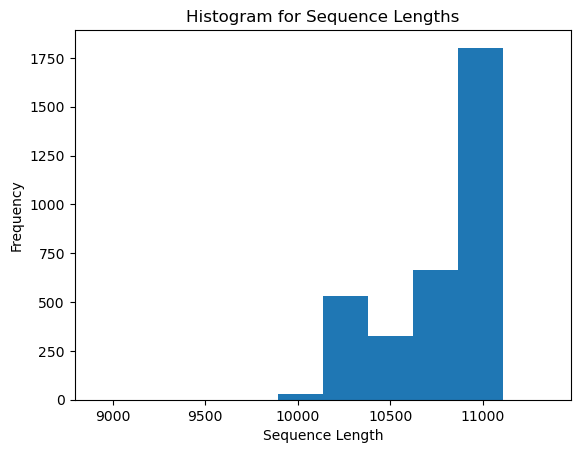

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(lens)
plt.title("Histogram for Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show() 

In [5]:
sequences2 = fastaToDict("../scraping-v2/sequences.fa")

In [6]:
df = pd.DataFrame(list(sequences2.items()))
df2 = pd.DataFrame(list(d.items()))

In [7]:
total = pd.concat([df, df2], axis=0)
total

,0,1
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...
2044,>HM756672.1 West Nile virus isolate WNV-1/US/B...,CCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAAC...
2045,>KJ501244.1 West Nile virus isolate WNV-1/US/B...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2046,>KC736499.1 West Nile virus isolate AVA1204580...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2047,">DQ164198.1 West Nile virus isolate TX 2002 1,...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...


In [8]:
total.drop_duplicates(subset=[1], keep='first', inplace=True)
total

,0,1
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...
2006,>GU828003.1 West Nile virus isolate Bird1881 p...,TTAACAACAATTAACACAGTGCGAGCTGTTTCTTAGCACGAAGATC...
2008,>KR349019.1 West Nile virus isolate SHAS_235_2...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...
2010,>DQ431698.1 West Nile virus isolate 03-120FL p...,ATGTCTAAGAAACCAGGAGGGCCCGGCAAGAGCCGGGCTGTCAATA...
2022,>KR348998.1 West Nile virus isolate SAYO_2604_...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...


In [9]:
total

,0,1
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...
2006,>GU828003.1 West Nile virus isolate Bird1881 p...,TTAACAACAATTAACACAGTGCGAGCTGTTTCTTAGCACGAAGATC...
2008,>KR349019.1 West Nile virus isolate SHAS_235_2...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...
2010,>DQ431698.1 West Nile virus isolate 03-120FL p...,ATGTCTAAGAAACCAGGAGGGCCCGGCAAGAGCCGGGCTGTCAATA...
2022,>KR348998.1 West Nile virus isolate SAYO_2604_...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...


In [10]:
total["seq_name"] = total[0].apply(lambda x: x[1:].split(" ", maxsplit=1)[0])
total.rename(columns={0: "header", 1: 'sequence'}, inplace=True)
total = total[["seq_name", "header", "sequence"]]
total.to_excel("merged_sequence_no_duplicat.xlsx")
total

,seq_name,header,sequence
0,NC_009942.1,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,NC_001563.2,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,PP524755.1,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,PP524756.1,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,LC817237.1,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...,...
2006,GU828003.1,>GU828003.1 West Nile virus isolate Bird1881 p...,TTAACAACAATTAACACAGTGCGAGCTGTTTCTTAGCACGAAGATC...
2008,KR349019.1,>KR349019.1 West Nile virus isolate SHAS_235_2...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...
2010,DQ431698.1,>DQ431698.1 West Nile virus isolate 03-120FL p...,ATGTCTAAGAAACCAGGAGGGCCCGGCAAGAGCCGGGCTGTCAATA...
2022,KR348998.1,>KR348998.1 West Nile virus isolate SAYO_2604_...,GTTCACAGCAATTGCTCCGACCCGAGCAGTGCTGGATCGATGGAGA...


In [45]:
for index, row in total.iterrows():
    folder_path = "../data/sequence_data/single_sequence/"
    seq_name = row[0][1:].split(" ", maxsplit=1)[0]
    
    f = open(folder_path + seq_name + ".fa", "w")
    f.write(row[0] + "\n")
    f.write(row[1] + "\n")
    f.close()

In [46]:
f = open("../data/sequence_data/single_sequence/" + "giant.fa", "w")
for index, row in total.iterrows():
    f.write(row[0] + "\n")
    f.write(row[1] + "\n")
f.close()


In [8]:
total_has_duplicates = pd.concat([df, df2], axis=0)
total_has_duplicates[total_has_duplicates[0] == "> W0939"]
total_has_duplicates.loc[1299, 0] = ">W0939"

In [9]:
total_has_duplicates["seq_name"] =  total_has_duplicates[0].apply(lambda x: x[1:].split(" ", maxsplit=1)[0])

In [10]:
for index, row in total_has_duplicates.iterrows():
    dup_list = total_has_duplicates[(total_has_duplicates["seq_name"] != row["seq_name"]) & (total_has_duplicates[1] == row[1])]["seq_name"]
    
    total_has_duplicates.loc[index, "dup"] = ",".join(dup_list)

In [11]:
total_has_duplicates

,0,1,seq_name,dup
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,NC_009942.1,
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,NC_001563.2,
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...,PP524755.1,
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...,PP524756.1,
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,LC817237.1,
...,...,...,...,...
2044,>HM756672.1 West Nile virus isolate WNV-1/US/B...,CCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAAC...,HM756672.1,
2045,>KJ501244.1 West Nile virus isolate WNV-1/US/B...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KJ501244.1,
2046,>KC736499.1 West Nile virus isolate AVA1204580...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KC736499.1,
2047,">DQ164198.1 West Nile virus isolate TX 2002 1,...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,DQ164198.1,


In [24]:
total_has_duplicates[total_has_duplicates["dup"] != ""][["seq_name", "dup"]].to_excel("duplications.xlsx")

In [17]:
total_has_duplicates[total_has_duplicates["dup"].isna()]

,0,1,seq_name,dup


In [71]:
total_has_duplicates.rename(columns={0: "header", 1: 'sequence'}, inplace=True)
total_has_duplicates

,header,sequence,dup,seq_name
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,,NC_009942.1
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,DQ411032.1,NC_001563.2
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...,DQ374650.1,PP524755.1
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...,,PP524756.1
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,,LC817237.1
...,...,...,...,...
2044,>HM756672.1 West Nile virus isolate WNV-1/US/B...,CCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAAC...,HM756672.1,HM756672.1
2045,>KJ501244.1 West Nile virus isolate WNV-1/US/B...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KJ501244.1,KJ501244.1
2046,>KC736499.1 West Nile virus isolate AVA1204580...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KC736499.1,KC736499.1
2047,">DQ164198.1 West Nile virus isolate TX 2002 1,...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,DQ164198.1,DQ164198.1


In [72]:
total_has_duplicates = total_has_duplicates[["seq_name", "dup", "header", "sequence"]]
total_has_duplicates

,seq_name,dup,header,sequence
0,NC_009942.1,,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
1,NC_001563.2,DQ411032.1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2,PP524755.1,DQ374650.1,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...
3,PP524756.1,,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...
4,LC817237.1,,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
...,...,...,...,...
2044,HM756672.1,HM756672.1,>HM756672.1 West Nile virus isolate WNV-1/US/B...,CCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAAC...
2045,KJ501244.1,KJ501244.1,>KJ501244.1 West Nile virus isolate WNV-1/US/B...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2046,KC736499.1,KC736499.1,>KC736499.1 West Nile virus isolate AVA1204580...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...
2047,DQ164198.1,DQ164198.1,">DQ164198.1 West Nile virus isolate TX 2002 1,...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...


In [73]:
total_has_duplicates.to_excel("merged_sequence.xlsx")

In [33]:
total_has_duplicates

,0,1,seq_name,dup
0,">NC_009942.1 |West Nile virus lineage 1, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,NC_009942.1,
1,">NC_001563.2 |West Nile virus lineage 2, compl...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,NC_001563.2,
2,>PP524755.1 |West Nile virus isolate RO_moR23-...,AGCACGAAGATCTCGATGTCTAAGAAACCAGGAGGGCCCGGTAAAA...,PP524755.1,
3,>PP524756.1 |West Nile virus isolate RO_moR23-...,GACAAACTTAGTAGTGTTTGTGAGGATTAACAACAATTAACACAGT...,PP524756.1,
4,>LC817237.1 |West Nile virus Croc110_2019_1_ZM...,AACAGCTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,LC817237.1,
...,...,...,...,...
2044,>HM756672.1 West Nile virus isolate WNV-1/US/B...,CCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGGATTAACAAC...,HM756672.1,
2045,>KJ501244.1 West Nile virus isolate WNV-1/US/B...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KJ501244.1,
2046,>KC736499.1 West Nile virus isolate AVA1204580...,AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,KC736499.1,
2047,">DQ164198.1 West Nile virus isolate TX 2002 1,...",AGTAGTTCGCCTGTGTGAGCTGACAAACTTAGTAGTGTTTGTGAGG...,DQ164198.1,


In [2]:
!open .